## Instructions {-}

1. You may talk to a friend, discuss the questions and potential directions for solving them. However, you need to write your own solutions and code separately, and not as a group activity. 

2. Do not write your name on the assignment.

3. Write your code in the *Code* cells and your answer in the *Markdown* cells of the Jupyter notebook. Ensure that the solution is written neatly enough to understand and grade.

4. Use [Quarto](https://quarto.org/docs/output-formats/html-basics.html) to print the *.ipynb* file as HTML. You will need to open the command prompt, navigate to the directory containing the file, and use the command: `quarto render filename.ipynb --to html`. Submit the HTML file.

5. The assignment is worth 100 points, and is due on **10th November 2023 at 11:59 pm**. 

6. There is a bonus question worth 20 points, and an ultra bonus question worth 30 points. However, there is no partial credit for these questions. You will get 20 or 0 for the bonus question, and 30 or 0 for the ultra-bonus question. If everything is correct, you can score 150 out of 100 in the assignment.

## Missing value imputation
Read *Housing_missing_price.csv* as `housing_missing_price` and *Housing_complete.csv* as `housing_complete`. The datasets consist of housing features, like number of bedrooms, bathrooms, etc., and the price. Both datasets are exactly the same, except that *Housing_missing_price.csv* has some missing values of price. In this question, you will try different methods to impute the missing values of house price in the file *Housing_missing_price.csv*. You will use the prices in *Housing_complete.csv* to check the accuracy of your imputation.

Note that you **cannot** use *Housing_complete.csv* to impute missing `price` in any of the questions. *Housing_complete.csv* is just to check the accuracy of your imputation, after you have done the imputation. Before imputing the missing `price`, assume you do not have *Housing_complete.csv*.

In [108]:
import pandas as pd
housing_missing_price = pd.read_csv('/Users/jinwens/Desktop/2023Fall/STAT303/Assignment5_files /Housing_missing_price.csv')
housing_complete = pd.read_csv('/Users/jinwens/Desktop/2023Fall/STAT303/Assignment5_files /Housing_complete.csv')

### Number of missing values
How many values of `price` are missing in *Housing_missing_price.csv*?

*(3 points)*

In [2]:
housing_missing_price

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000.0,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000.0,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000.0,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000.0,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,NaN,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000.0,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000.0,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
housing_missing_price.isnull().sum()

price               25
area                 0
bedrooms             0
bathrooms            0
stories              0
mainroad             0
guestroom            0
basement             0
hotwaterheating      0
airconditioning      0
parking              0
prefarea             0
furnishingstatus     0
dtype: int64

In [34]:
len(housing_missing_price['area'].unique())

284

In [35]:
len(housing_missing_price['area'])

545

## E1.1 ## 
**25 values of price are missing in Housing_missing_price.csv**

### Indices of missing values
Find the row labels, where the `price` is missing. Assign those row labels as an array or a list to `index_null_price`.

*(4 points)*

In [6]:
index_null_price = housing_missing_price.index[housing_missing_price['price'].isnull()].tolist()
print(index_null_price)

[47, 63, 64, 68, 71, 100, 102, 148, 156, 175, 218, 223, 251, 275, 287, 304, 311, 344, 356, 400, 408, 459, 462, 520, 541]


## E1.2 ## 
The row labels at where the price is missing are: **[47, 63, 64, 68, 71, 100, 102, 148, 156, 175, 218, 223, 251, 275, 287, 304, 311, 344, 356, 400, 408, 459, 462, 520, 541]**

### Correlation of continuous variables with `price`
Find the continuous variable having the highest correlation with `price`. Let the variable be $A_{cont}$.

*(2 points)*

In [23]:
# Assume we work with the file: housing_missing_price
correlation = housing_missing_price.corr()['price'].dropna().sort_values(ascending=False)

/var/folders/vh/bnk8gjpn5998vq44hzdttvwc0000gn/T/ipykernel_35588/2918803582.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = housing_missing_price.corr()['price'].dropna().sort_values(ascending=False)


In [20]:
correlation 

price        1.000000
area         0.536065
bathrooms    0.521667
stories      0.415986
parking      0.384239
bedrooms     0.366228
Name: price, dtype: float64

## E1.3 
Accoridng to the  coefficients above, **area** has the highest correlation with `price`. 

Thus, $A_{cont}$ is variable: **area**. 

### Missing value imputation using correlated continuous variable
Make a scatterplot of `price` against $A_{cont}$, with a trendline. Using the trendline, impute the missing values of `price`. 

Plot the imputed `price` vs true `price` (from *Housing_complete.csv*) and print the RMSE (*Root mean squared error*). This is to be done only for the imputed values of `price`.

*(10 points)*

**Hint:**

1. Make the trendline using non-missing values of `price` and $A_{cont}$.

2. Impute the missing values of `price` only where they are missing, i.e., at row indices `index_null_price`.

3. You may use the function below to plot the imputed price vs true price (*from Housing_complete.csv*) and print the RMSE. The function assumes that `housing_imputed_price` is the *Housing_missing_price.csv* dataset, with imputed values of `price`.

In [31]:
#Defining a function to plot the imputed values vs actual values 
def plot_actual_vs_predicted():
    fig, ax = plt.subplots(figsize=(9, 6))
    plt.rc('xtick', labelsize=15) 
    plt.rc('ytick', labelsize=15) 
    x = housing_complete.loc[index_null_price,'price']/1e3
    y = housing_imputed_price.loc[index_null_price,'price']/1e3
    plt.scatter(x,y)
    z=np.polyfit(x,y,1)
    p=np.poly1d(z)
    plt.plot(x,x,color='orange')
    plt.xlabel('Actual price',fontsize=20)
    plt.ylabel('Imputed price',fontsize=20)
    ax.xaxis.set_major_formatter('${x:,.0f}k')
    ax.yaxis.set_major_formatter('${x:,.0f}k')
    rmse = np.sqrt(((x-y).pow(2)).mean())
    print("RMSE= $"+str(np.round(rmse,2))+"k")

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error


# Filter out rows with non-missing 'price' values
non_missing_data = housing_missing_price.dropna(subset=['price'])

z = np.polyfit(non_missing_data['area'], non_missing_data['price'], 1) #Finding the slope and intercept for the trendline
trendline_eq = np.poly1d(z) #Defining a function that computes the 'y' given 'x' for the trendline

trendline_eq


poly1d([4.66397577e+02, 2.37274000e+06])

RMSE= $1289.93k


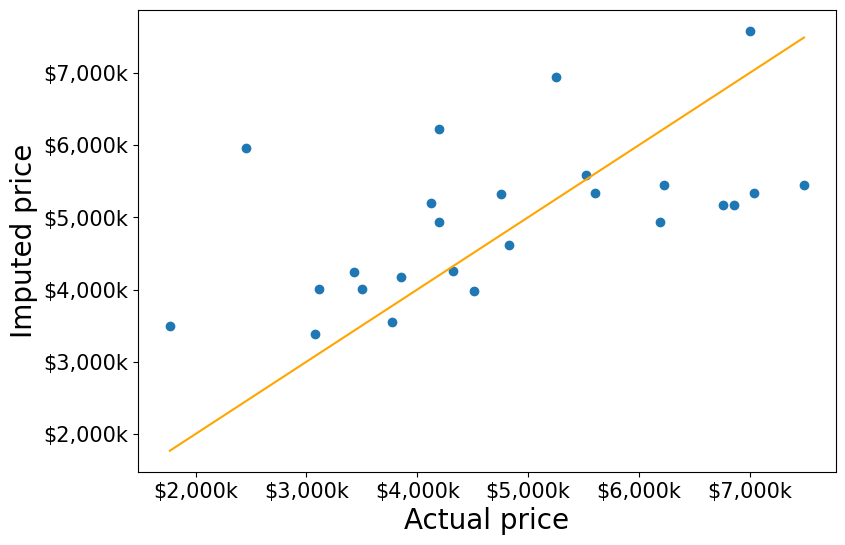

In [38]:
# Impute the missing values using the trendline equation
housing_imputed_price = housing_missing_price.copy()
housing_imputed_price.loc[index_null_price,'price'] = trendline_eq(housing_missing_price.loc[index_null_price, 'area'])

plot_actual_vs_predicted()

## E1.4 ##

### Correlation of categorical variables with `price`
Split the categorical columns of the *Housing_missing_price.csv*, such that they transform into dummy variables with each category corresponding to a column of 0s and 1s. The continuous variables remain as they were in the original dataset. Name this dataset as `housing_dummy`.

Which categorical variable is the most highly correlated with `price`? Let that variable be $V_{cat}$.

*(3 + 2 points)*

In [47]:
housing_dummy = pd.get_dummies(housing_missing_price)
housing_dummy

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.330000e+07,7420,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,1.225000e+07,8960,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,1.225000e+07,9960,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,1.221500e+07,7500,4,2,2,3,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,1.141000e+07,7420,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.820000e+06,3000,2,1,1,2,0,1,1,0,...,1,1,0,1,0,1,0,0,0,1
541,3.492094e+06,2400,3,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
542,1.750000e+06,3620,2,1,1,0,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1
543,1.750000e+06,2910,3,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0


**Hint:** `pd.get_dummies()`

In [49]:
correlation_with_dummies = housing_dummy.corr()['price'].dropna().sort_values(ascending=False)

correlation_with_dummies

price                              1.000000
area                               0.545589
bathrooms                          0.511698
airconditioning_yes                0.437497
stories                            0.402022
parking                            0.382830
bedrooms                           0.357807
prefarea_yes                       0.321113
mainroad_yes                       0.296026
guestroom_yes                      0.256867
furnishingstatus_furnished         0.218284
basement_yes                       0.191599
hotwaterheating_yes                0.092869
furnishingstatus_semi-furnished    0.070370
hotwaterheating_no                -0.092869
basement_no                       -0.191599
guestroom_no                      -0.256867
furnishingstatus_unfurnished      -0.277334
mainroad_no                       -0.296026
prefarea_no                       -0.321113
airconditioning_no                -0.437497
Name: price, dtype: float64

## E1. 5
Airconditioning is the most highly correlated with `price`. Thus, Airconditioning is the $V_{cat}$.

### Missing value imputation using correlated categorical variable

Impute the missing value of the `price` of a house as the average price of all the houses that have the same value of $V_{cat}$. For example, if $V_{cat}$ is `basement`, the missing price of a house that has a basement must be imputed as the average price of all the houses that have a basement, and the missing price of a house that lacks a basement must be imputed as the average price of all the houses that lack a basement.

Plot the imputed `price` vs true `price` (from *Housing_complete.csv*) and print the RMSE (Root mean squared error). This is to be done only for the imputed values of `price`.

*(10 points)*

**Hint:** You may use the following code to get the mean house price for each level of the variable $V_{cat}$:

In [100]:
#Replace 'Vcat' by the variable that you found to be the most correlated with 'price'
price_airconditioning = housing_missing_price['price'].groupby([housing_missing_price['airconditioning']]).mean()
price_airconditioning.mean()

5096678.147913387

In [101]:
price_airconditioning

airconditioning
no     4.224304e+06
yes    5.969053e+06
Name: price, dtype: float64

In [112]:
housing_imputed_price = housing_missing_price.copy()

housing_imputed_price['price'] = housing_imputed_price.apply(
    lambda row: price_airconditioning['yes'].mean() if (pd.isnull(row['price']) and row['airconditioning'] == 'yes') 
    else (price_airconditioning['no'].mean() if (pd.isnull(row['price']) and row['airconditioning'] == 'no') else row['price']), 
    axis=1
)

housing_imputed_price['price'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Name: price, Length: 545, dtype: bool

In [115]:
housing_imputed_price['price'], housing_imputed_price['airconditioning']

(0      1.330000e+07
 1      1.225000e+07
 2      1.225000e+07
 3      1.221500e+07
 4      1.141000e+07
            ...     
 540    1.820000e+06
 541    4.224304e+06
 542    1.750000e+06
 543    1.750000e+06
 544    1.750000e+06
 Name: price, Length: 545, dtype: float64,
 0      yes
 1      yes
 2       no
 3      yes
 4      yes
       ... 
 540     no
 541     no
 542     no
 543     no
 544     no
 Name: airconditioning, Length: 545, dtype: object)

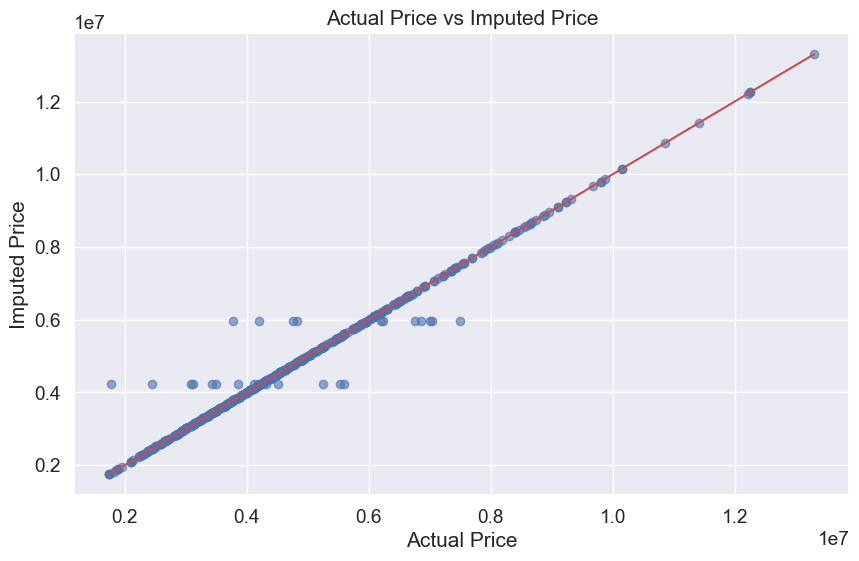

1174934.31044032

In [120]:
housing_imputed_price = housing_missing_price.copy()

for choice in price_airconditioning.index:
    housing_imputed_price.loc[(housing_imputed_price['airconditioning'] == choice)
                             & (housing_imputed_price['price'].isnull()), 
                              'price'] = price_airconditioning[choice]

plot_actual_vs_predicted()
imputed_indices = housing_missing_price['price'].isnull()
rmse = np.sqrt(mean_squared_error(housing_complete.loc[imputed_indices, 'price'], 
                                  housing_imputed_price.loc[imputed_indices, 'price']))
rmse

### Missing value imputation using correlated continuous variable within the categories of correlated categorical variable
Execute the following code. Note that the trendlines of `price` against `area` are different based on `airconditioning`.

For each house, select the appropriate trendline to impute the missing `price`.

Plot the imputed price vs true price (from *Housing_complete.csv*) and print the RMSE (Root mean squared error).  This is to be done only for the imputed values of `price`.

*(15 points)*

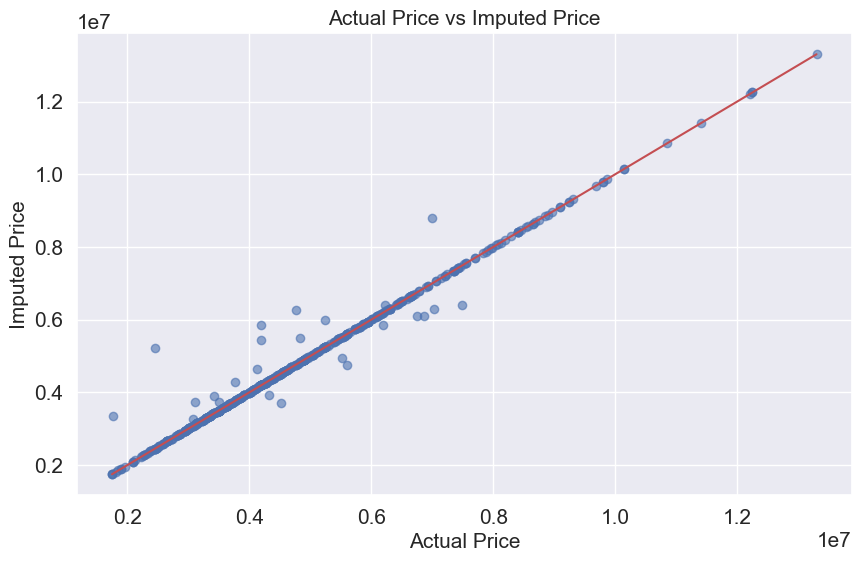

1036420.1265597398

In [117]:
# Implementing the provided imputation approach and creating the plot

# Setup variables
x = housing_missing_price['area']
y = housing_missing_price['price']
housing_imputed_price = housing_missing_price.copy()

# Imputation process
for entry in housing_missing_price['airconditioning'].unique():
    idx_non_missing = (np.isfinite(x)) & (np.isfinite(y)) & (housing_missing_price['airconditioning'] == entry)
    idx_missing = (y.isnull()) & (housing_missing_price['airconditioning'] == entry)
    sub_x = x[idx_non_missing]
    sub_y = y[idx_non_missing]
    slope_int = np.polyfit(sub_x, sub_y, 1)
    f = np.poly1d(slope_int)
    housing_imputed_price.loc[idx_missing, 'price'] = f(housing_missing_price.loc[idx_missing, 'area'])


# Plotting actual vs imputed prices
plot_actual_vs_predicted()

# Calculating RMSE for the imputed values
imputed_indices = housing_missing_price['price'].isnull()
rmse = np.sqrt(mean_squared_error(housing_complete.loc[imputed_indices, 'price'], 
                                  housing_imputed_price.loc[imputed_indices, 'price']))
rmse


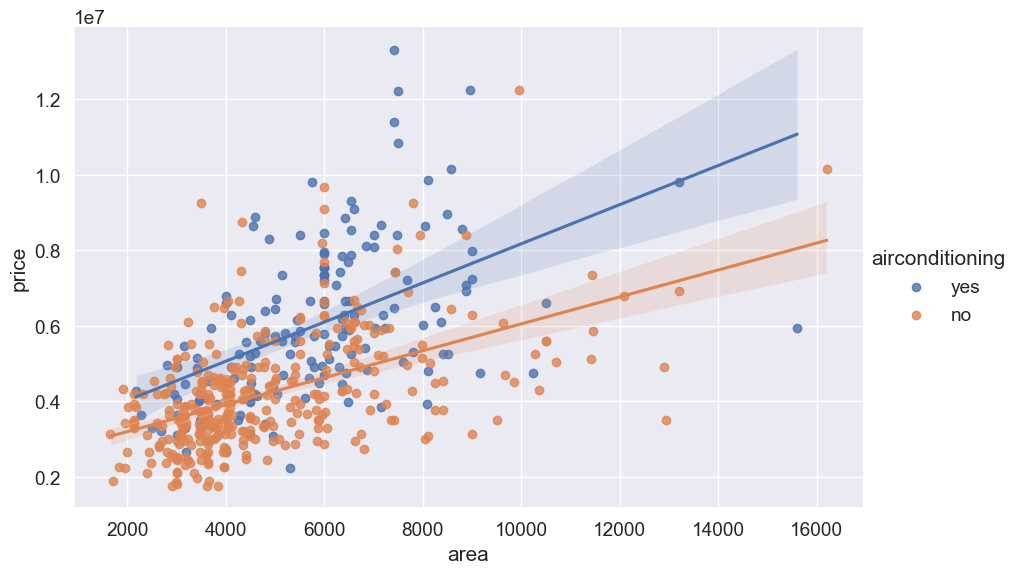

In [118]:
sns.set(font_scale=1.25)
a = sns.FacetGrid(housing_missing_price, hue = 'airconditioning',height=6, aspect=1.5)
a.map(sns.regplot,'area','price')
a.add_legend()

### **Bonus** question: Missing value imputation with KNN

*(20 points)*

#### Identifying optimal $K$ by $k$-fold cross validation

You need to impute the missing `price` using the KNN ($K$-nearest neighbor) algorithm. However, before implementing the algorithm, find the optimal value of $K$, using $k$-fold cross-validation. Use all the variables in `housing_dummy`.

Note that you **cannot** use *Housing_complete.csv* to find the optimal $K$.

Follow the $k$-fold cross validation procedure below to find the optimal $K$, i.e., the optimal number of nearest neighbors to consider when imputing missing values:

1. Remove observations with missing `price` from `housing_dummy`. Let us call the resulting DataFrame as `housing_missing_removed`.

2. Split `housing_missing_removed` into $k$-folds. Take $k=10$. Each fold will have one-tenth of the observations of `housing_missing_removed`.

3. Iterate over the $K^{th}$ potential value of $K$, where $K \in \{1,2,...,50\}$.

   A. Iterate over the $i^{th}$ fold, where $i \in \{1,2,...,10\}$

      I. Assume that the all the `price` values of the $i^{th}$ fold are missing. Impute the value of `price` for an observation in the $i^{th}$ fold as the mean `price` of the $K$-nearest neighbors to the observation, where the neighbors are from among the observations in the remaining 9 folds. 
        
      II. Compute the RMSE (Root mean squared error) for the $i^{th}$ fold. Let us denote the RMSE for $i^{th}$ fold, and considering $K$ nearest neighbors as $RMSE_{iK}$.

   B. Find the average of the 10 RMSEs obtained in 3(A). Let us denote it as $RMSE_K$, i.e., RMSE for a given value of $K$. Then, $$RMSE_K = \frac{1}{10} \sum_{i=1}^{i=10} RMSE_{iK}$$

4. The optimal value of $K$ is the one for which $RMSE_K$ is the minimum, i.e., $$K_{optimal}=\underset{K \in \{1,...,50\}}{\operatorname{\ argmin}} RMSE_K$$

**Assumption to make it a bit simpler:**
Ideally you should split the dataset randomly into $k$-folds. However, to make it simpler, you may assume that the data is already shuffled, and you may take the first $1/10^{th}$ observations to be in the $1^{st}$ fold, the next $1/10^{th}$ to be in the $2^{nd}$ fold and so on.

**More explanation** about $k$-fold cross validation and the optimal $K$:

You need to impute the missing price using the KNN (K-nearest neighbor) algorithm. However, before implementing the algorithm, find the optimal value of $K$, using $k$-fold cross-validation. This is an optimization method used for more advanced Machine Learning methods, such as KNN. In KNN, the number of neighbors, $K$, is called a hyperparameter, which cannot be optimized with a mathematical method. Therefore, it needs a more coding-based optimization method called cross-validation.  

The idea of cross-validation is to split the dataset into subsets, called folds. After that a range of $K$ values is picked. For each $K$ value in the range, the KNN imputer is created and evaluated on each fold separately, returning an RMSE value for each fold. The average value of these RMSE values is the cross-validation RMSE value of that $K$ value. 
Cross-validation is a robust method to find the best $K$ in the KNN algorithm for the data at hand because it evaluates different parts of the data separately and takes the average of all results. It is called $k$-fold cross-validation, with $k$ as the number of folds we want to use, usually 3, 5 or 10. In this problem, we will use 10-fold cross-validation. 
Note that you need nested for loops to iterate over both each $K$ value and each fold for this algorithm. 

#### Implementing KNN with optimal $K$
Using the optimal value of $K = K_{optimal}$ obtained in the previous question, impute the missing values of `price` in `housing_missing_price`. Use all the variables in `housing_dummy` for implementing the KNN algorithm. Plot the imputed price vs true price (from *Housing_complete.csv*) and print the RMSE (Root mean squared error).  This is to be done only for the imputed values of `price`.

Answer check: The RMSE obtained with KNN should be lower than that obtained with any of the earlier methods. If not, then there may be some mistake in your KNN implementation.

In [128]:
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.metrics import mean_squared_error

# Remove observations with missing 'price'
housing_missing_removed = housing_dummy.dropna(subset=['price'])

# Splitting the dataset into 10 folds
kf = KFold(n_splits=10, shuffle=False)

# Preparing to iterate over K values and folds
k_values = range(1, 51)  # K values from 1 to 50
average_rmse_per_k = []

# Perform KNN imputation for each K
for k in k_values:
    rmse_per_fold = []

    for train_index, test_index in kf.split(housing_missing_removed):
        train, test = housing_missing_removed.iloc[train_index], housing_missing_removed.iloc[test_index]

        # KNN model
        knn = KNeighborsRegressor(n_neighbors=k)
        
        # Features and target
        X_train, X_test = train.drop('price', axis=1), test.drop('price', axis=1)
        y_train, y_test = train['price'], test['price']
        
        # Fit the model
        knn.fit(X_train, y_train)
        
        # Predict and calculate RMSE
        predictions = knn.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        rmse_per_fold.append(rmse)

    # Average RMSE for this K
    average_rmse_per_k.append(np.mean(rmse_per_fold))

# Identify the optimal K based on the lowest average RMSE
optimal_k = k_values[np.argmin(average_rmse_per_k)]
optimal_k, min(average_rmse_per_k)  # Optimal K and its corresponding average RMSE


(11, 1508331.2585256437)

'K' optimal = 11, and its corresponding average is 1508331.2585256437

/var/folders/vh/bnk8gjpn5998vq44hzdttvwc0000gn/T/ipykernel_35588/2896756061.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  housing_imputed.iloc[:, :] = knn_imputer.fit_transform(housing_imputed)


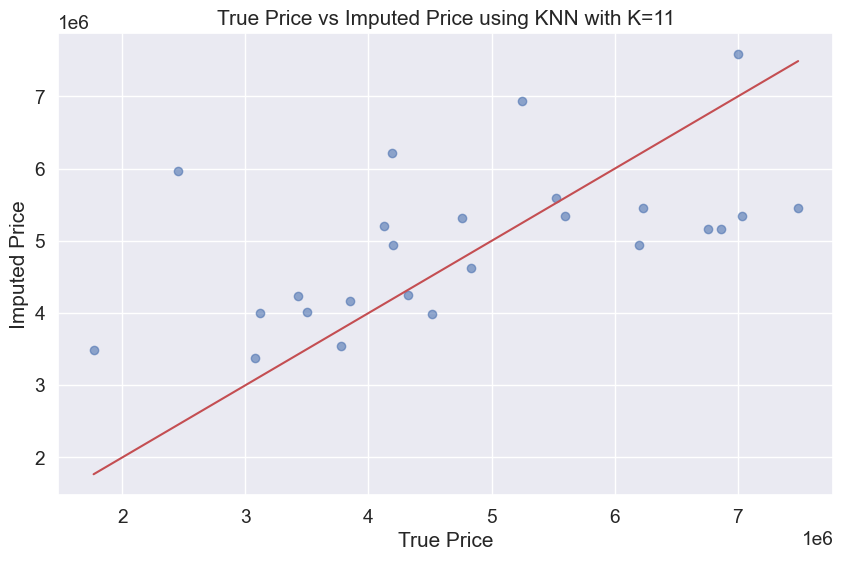

RMSE: 1289929.9934769191


In [130]:
# Setting the optimal K for KNN
optimal_k = 11

# Create a KNN imputer instance
knn_imputer = KNNImputer(n_neighbors=optimal_k)

# Apply the imputer to the housing_dummy dataset
housing_imputed = housing_dummy.copy()
housing_imputed.iloc[:, :] = knn_imputer.fit_transform(housing_imputed)

# Create a DataFrame from the imputed data
housing_imputed_df = pd.DataFrame(housing_imputed, columns=housing_dummy.columns)

# Extracting the imputed price values
imputed_price = housing_imputed_df['price'][housing_missing_price['price'].isnull()]

# Extracting the corresponding true price values from 'Housing_complete.csv'
true_price = housing_complete['price'][housing_missing_price['price'].isnull()]

# Plotting imputed price vs true price
plt.figure(figsize=(10, 6))
plt.scatter(true_price, imputed_price, alpha=0.6)
plt.title('True Price vs Imputed Price using KNN with K=11')
plt.xlabel('True Price')
plt.ylabel('Imputed Price')
plt.plot([true_price.min(), true_price.max()], [true_price.min(), true_price.max()], 'r')  # Line of equality
plt.grid(True)
plt.show()

# Calculating RMSE for the imputed values
rmse_knn = np.sqrt(mean_squared_error(true_price, imputed_price))
print(f"RMSE: {rmse_knn}")

## E 1.8 
The Root Mean Squared Error (RMSE) for these imputed values is approximately 1289929.9934769191. This value represents the average magnitude of error between the imputed and actual prices.

### **Ultra-bonus** question

*(30 points)*

Develop an algorithm to impute the missing `price`, such that it reduces the imputation RMSE to below $650k. Plot the imputed price vs true price (from *Housing_complete.csv*) and print the RMSE (Root mean squared error). This is to be done only for the imputed values of `price`.

*Note that we have not attempted to solve this question yet. We are not sure if a solution exists. However, if you find a solution, you will get 30 points.*

**Hint:** In the bonus question, all variables were given equal weights when imputing missing values with KNN. However, shouldn't some variables be given higher weight than others?


*If you think you are successful, email your solution to krish@northwestern.edu for grading.*

## Binning
Read *house_features_and_price.csv*. We will bin a couple of variables to better analyze the trend of `house_price` with those variables.

In [132]:
house_price = pd.read_csv('/Users/jinwens/Desktop/2023Fall/STAT303/Assignment5_files /house_features_and_price.csv')

In [134]:
house_price

,house_id,house_age,distance_MRT,number_convenience_stores,latitude,longitude,house_price
0,210,5.2,390.5684,5,24.97937,121.54245,2724.84
1,190,35.3,616.5735,8,24.97945,121.53642,1789.29
2,328,15.9,1497.7130,3,24.97003,121.51696,556.96
3,5,7.1,2175.0300,3,24.96305,121.51254,1030.41
4,412,8.1,104.8101,5,24.96674,121.54067,2756.25
...,...,...,...,...,...,...,...
270,251,31.7,1159.4540,0,24.94960,121.53018,190.44
271,359,5.6,2408.9930,0,24.95505,121.55964,610.09
272,182,13.5,2147.3760,3,24.96299,121.51284,556.96
273,329,13.6,4197.3490,0,24.93885,121.50383,368.64


### Trend with `house_age`
Make a scatterplot of `house_price` against `house_age`, along with the trendline. What is the trend indicated by the trendline?

*(4 points)*

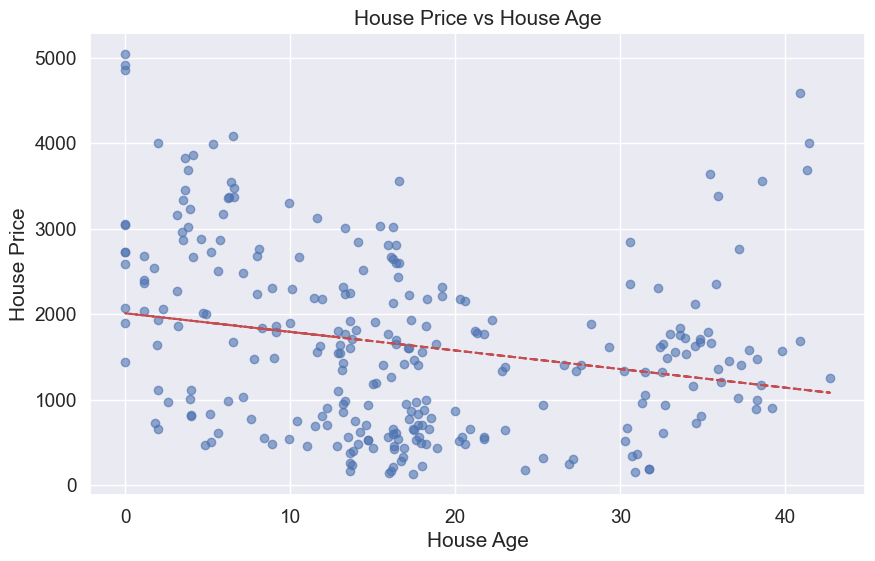

array([ -21.76532765, 2009.25159111])

In [138]:
plt.figure(figsize=(10, 6))
plt.scatter(house_price['house_age'], house_price['house_price'], alpha=0.6)
plt.title('House Price vs House Age')
plt.xlabel('House Age')
plt.ylabel('House Price')

z = np.polyfit(house_price['house_age'], house_price['house_price'], 1)
p = np.poly1d(z)
plt.plot(house_price['house_age'], p(house_price['house_age']), "r--")

plt.grid(True)
plt.show()

z

# E2.1
This equation indicates a negative correlation between house_age and house_price, suggesting that as the age of the house increases, its price tends to decrease, which is visually represented by the downward slope of the trendline

### Trend with bins of `house_age`

#### 
Bin `house_age` into 5 approximately equal-sized bins. 

*(3 points)*

#### 
After binning, plot the mean `house_price` against the house age bins. 

*(3 points)*

#### 
Is the trend seen with this plot different from that seen with the trendline in the previous question? If yes, then is one of the trends incorrect? Why or why not? 

*(4 points)*

#### 
Is one of the trends more informative? If yes, then which one and how?

*(4 points)*

In [140]:
# E2.2
# E.2.2.1 : Bin house_age into 5 approximately equal-sized bins.
# Binning 'house_age' into 5 approximately equal-sized bins
house_price['house_age_bins'] = pd.qcut(house_price['house_age'], q=5)

# Grouping by mean 'house_price' for each bin
mean_price_per_bin = house_price.groupby('house_age_bins')['house_price'].mean()


<Axes: xlabel='house_age_bins', ylabel='house_price'>

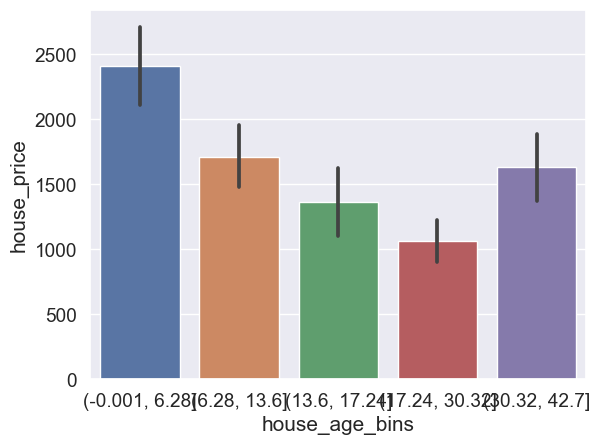

In [143]:
# E.2.2.2 : After binning, plot the mean house_price against the house age bins.
# E.2.2.2
sns.barplot(x = 'house_age_bins', 
            y = 'house_price', 
            data = house_price)

## E2.2.3
The trend within each bin can vary significantly from the overall trend observed in the previous question's continuous trendline.
The presence of these individual trendlines within each bin may reveal more complex relationships, such as non-linear patterns, that the overall trendline does not capture.
The difference in trends does not imply that one is incorrect; rather, they offer different perspectives. The overall trendline provides a broad, simplified view, while the binned trendlines uncover more nuanced, localized trends.

## E2.2.4
The binned analysis can be more informative as it reveals subtleties and non-linear trends in the data. For example, the increase in price in the oldest age bin might be due to factors like historical value, location, or construction quality, which a simple linear trend might not capture.

### Trend with `number_convenience_stores`
Make a barplot to visualize the mean `house_price` against `number_convenience_stores`. 

*(3 points)*

<Axes: xlabel='number_convenience_stores', ylabel='house_price'>

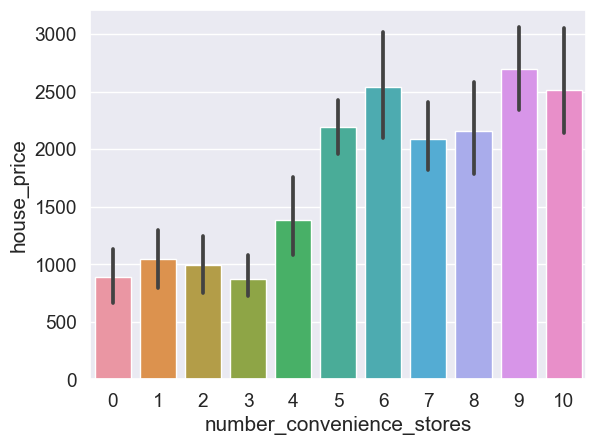

In [144]:
sns.barplot(x = 'number_convenience_stores', 
            y = 'house_price', 
            data = house_price)

### Trend with bins of `number_convenience_stores`
Bin `number_convenience_stores` into an appropriate number of bins such that the non-linear trend of the variation of `house_price` with the bins of `number_convenience_stores` is retained, while minimizing the number of bins.

After binning, plot the mean `house_price` against the `number_convenience_stores` bins.

*(8 points)*

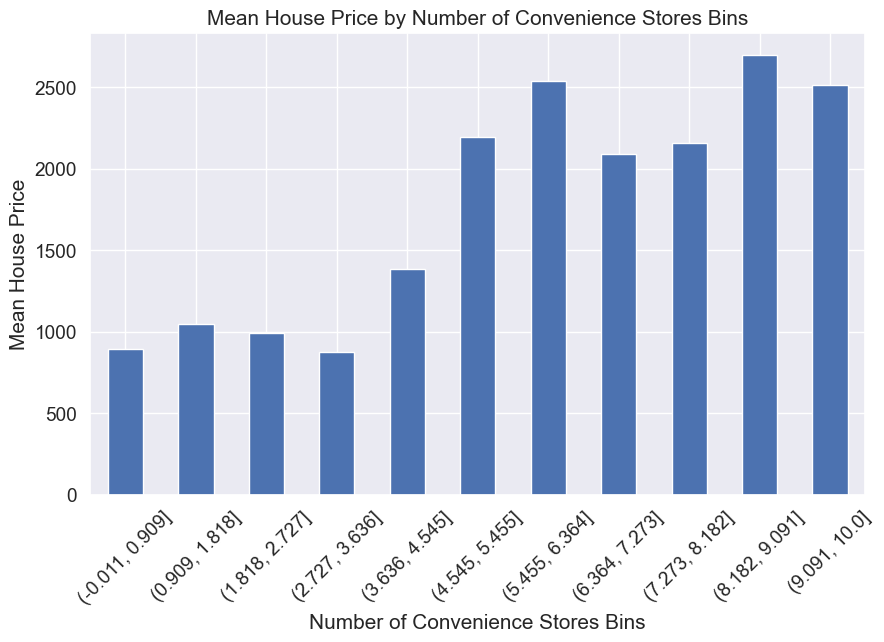

In [154]:
unique_values = house_price['number_convenience_stores'].nunique()
house_price['number_convenience_stores_bins'] = pd.cut(house_price['number_convenience_stores'], bins=unique_values, include_lowest=True)

# Calculating the mean 'house_price' for each bin
mean_price_per_store_bin = house_price.groupby('number_convenience_stores_bins')['house_price'].mean()

# Plotting the mean 'house_price' against the 'number_convenience_stores' bins
plt.figure(figsize=(10, 6))
mean_price_per_store_bin.plot(kind='bar')
plt.title('Mean House Price by Number of Convenience Stores Bins')
plt.xlabel('Number of Convenience Stores Bins')
plt.ylabel('Mean House Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Size of `number_convenience_stores` bins
Print the size of bins obtained in the previous question. Are the bins of approximately equal size? If not, is it reasonable to have bins of unequal sizes to visualize the trend of `house_price` with `number_convenience_stores`.?

*(2 + 4 points)*

In [156]:
# Printing the size of each bin for 'number_convenience_stores'
bin_sizes = house_price['number_convenience_stores_bins'].value_counts()

bin_sizes.sort_index()

(-0.011, 0.909]    46
(0.909, 1.818]     29
(1.818, 2.727]     15
(2.727, 3.636]     34
(3.636, 4.545]     17
(4.545, 5.455]     41
(5.455, 6.364]     25
(6.364, 7.273]     22
(7.273, 8.182]     21
(8.182, 9.091]     19
(9.091, 10.0]       6
Name: number_convenience_stores_bins, dtype: int64

## E2.5
Yes, it is reasonable to have bins of unequal sizes for several reasons. The unequal bin sizes likely reflect the actual distribution of convenience stores around the houses in the dataset. In urban planning and real estate, some configurations (like having many convenience stores nearby) are less common than others. For trend analysis, what matters most is the pattern or relationship between the number of stores and house prices. Unequal bin sizes can still effectively show this relationship, especially if the goal is to understand how property values change with varying levels of accessibility to amenities.

## Outliers

### Identifying outlying prices
Continue using `house_features_and_price.csv`. How many houses have outlying values of `house_price`. Are these houses extremely expensive or extremely cheap?

*(6 + 2 points)*

In [164]:
Q1 = house_price['house_price'].quantile(0.25)
Q3 = house_price['house_price'].quantile(0.75)
IQR = Q3 - Q1

# Defining outliers as those beyond 1.5 times the IQR from the quartiles
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Counting the number of outliers
outliers = house_price[(house_price['house_price'] < lower_bound) | (house_price['house_price'] > upper_bound)]
outliers

,house_id,house_age,distance_MRT,number_convenience_stores,latitude,longitude,house_price,house_age_bins,number_convenience_stores_bins
35,379,0.0,292.9978,6,24.97744,121.54458,4858.09,"(-0.001, 6.28]","(5.455, 6.364]"
54,105,0.0,292.9978,6,24.97744,121.54458,5041.00,"(-0.001, 6.28]","(5.455, 6.364]"
98,16,0.0,292.9978,6,24.97744,121.54458,4914.01,"(-0.001, 6.28]","(5.455, 6.364]"


In [165]:
Q1, Q3

(737.145, 2299.205)

Given these prices, it is evident that these **3** outliers are **extremely expensive houses**. Their prices are significantly higher than the typical range of house prices in the dataset, which has placed them in the outlier category

### Quick EDA
How are these houses (identified in the previous question as outliers) different from the houses in the rest of the dataset, which might be making them extremely expensive / extremely cheap? Explore the data and mention your hypothesis.

*(8 points)*

In [170]:
mean = [house_price['distance_MRT'].mean(), house_price['house_age'].mean()]
mean

[1082.4683462545454, 17.044]

Outliers have an age of 0, indicating they are brand new. In contrast, the average age of non-outliers is around 17 years. Newer houses often command higher prices due to modern design, newer materials, and less wear and tear.

The outliers are very close to an MRT station (approximately 293 meters away), while the average distance for non-outliers is much larger (about 1082 meters). Proximity to public transit is a significant factor in real estate valuation due to convenience and accessibility. The outlier houses are likely extremely expensive due to being brand new, their proximity to an MRT station, and their specific high-value location. These factors combined make them significantly more valuable than the average house in the dataset.
The extreme prices are likely justified by these premium features, and such houses would be appealing to buyers looking for new construction, convenience in transportation, and a desirable location